<a href="https://colab.research.google.com/github/esperchain/Tutorial_fdigitales_1/blob/main/Tutorial_De_filtros_activos_a_filtros_digitales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción



Partiendo de una función de transferencia conocida en dominio $s$, trataremos de simular su comportamiento con algún tipo de programa que, para las mismas señales de entrada emule su salida. Dado que la simulación opera en *tiempo discreto*, debemos algún metodo para hacer un equivalente del comportamiento real que es en tiempo continuo.

Por ejemplo, asumamos que tenemos un filtro RC tal como el que se muestra en la figura:

![Filtro RC](https://drive.google.com/uc?id=11TBDoYNIHwjMjGDDM2P9AgNlqZebU4hu)

En este filtro sabemos que:

\begin{equation}
\dfrac{v_{o}(s)}{v_{i}(s)}=\dfrac{1}{sRC+1}
\end{equation}

O dicho de otra forma:

\begin{equation}
sv_{o}(s)\cdot RC+v_o(s) = v_{i}(s)
\end{equation}

Y aplicando las propiedades de la transformada de Laplace, podemos 
pasar la función de transferencia al dominio del tiempo, donde se tiene que:

\begin{equation}
\dfrac{d\ v_o(t)}{dt}\cdot RC+v_o(t)=v_i(t)
\end{equation}


Que en el fondo, nos recuerda que la transformada de Laplace no es más que una forma de resolver ecuaciones diferenciales. La ecuación diferencial nos describe la relación existente entre las señales de entrada y salida del sistema.

# Secuencias

Las señales reales tienen valores en tiempo continuo, es decir, para cada valor del tiempo $t$, hay un valor. Pero en los sistemas digitales, que operan de forma síncrona, las señales sólo tienen valores en tiempos discretos y se llaman secuencias. Esto se puede representar gráficamente como:

![Señales vs Secuencias](https://drive.google.com/uc?id=1DBLUQbmSnBRnlJrweHxkfODjrh3-iI6O)

En esta representación, se muestra una señal continua en color azul, que tiene valores para todos los tiempos (tiempo continuo), de la que se tiene una secuencia que la reprenta, en tiempos concretos (muestras en rojo). Si tenemos una frecuencia de muestreo constante $f_s$, la señal será muestreada a intervalos constantes $T_s=1/f_s$. Es decir que tenemos la señal $v(t)$ que es muestreada para tiempos discretos $v(n\times T_s)$ (donde $n$ son números enteros). Llamamos **secuencia** a la sucesión de valores obtenidos, de tal forma que $v[n]=v(n\times T_s)$. También llamamos $v_i$ al valor $i$ de la secuencia ($v_i=v(i\times T_S)$)

## Operaciones con secuencias

Con las secuencias se pueden realizar múltiples operaciones:

* Ganancia: $y_i= A\times x_i$
* Retardo: $y_i = x_{i-1}$. Equivale a un retardo en el tiempo de $T_s$.
* Retardo extendido: $y_i= x_{i-n}$. Equivale a un retardo en el tiempo de $n\times T_s$
* Diferencias: $y_i=x_i-x_{i-1}$


### Relación entre las ecuaciones en diferencias y las derivadas

La definición matemática de la derivada es:

\begin{equation}
\dfrac{d\ x(t)}{dt}=\lim_{h\rightarrow 0}
\dfrac{x(t)-x(t-h)}{h}
\end{equation}

Si llevamos esta ecuación al dominio de las secuencias, el límite inferior de $h$ es $T_s$, en resumen:

\begin{equation}
\dfrac{d\ x(i\times t)}{dt}=\lim_{h\rightarrow T_s}
\dfrac{x(i\times t)-x(i\times t-h)}{h}
= \dfrac{x_i-x_{i-1}}{T_s}
\end{equation}


Por tanto, se puede afirmar que:

\begin{equation}
\left\{
\begin{array}{rcl}
x'[n]&=&\dfrac{x[n]-x[n-1]}{T_s}\\
&&\\
x''[n]&=&\dfrac{x'[n]-x'[n-1]}{T_s}=
\dfrac{x[n]-2x[n-1]+x[n-2]}{T_s ^2}\\
&&\\
x'''[n]&=&\dfrac{x''[n]-x''[n-1]}{T_s}=
\dfrac{x[n]-3x[n-1]+3x[n-2]-x[n-3]}{T_s ^3}\\
&&\\
&\mbox{etc} \dots&\\
\end{array}
\right.
\end{equation}

### Aplicando la derivación en diferencias al filtro RC

La ecuación en el dominio del tiempo del filtro RC era:

\begin{equation}
 v'_o(t)\cdot RC+v_o(t)=v_i(t)
\end{equation}

Esta ecuación pasada a ecuaciones en diferencias resulta:

\begin{equation}
v'_o[n]\cdot RC +v_o[n]=v_i[n]
\end{equation}

Por tanto:
\begin{equation}
\dfrac{v_o[n]-v_o[n-1]}{T_s}\cdot RC +v_o[n]=v_i[n]
\end{equation}

Lo único desconocido en esta ecuación es $v_o[n]$, la salida actual, que según la ecuación depende de la salida anterior $v_o[n-1]$ y la entrada actual $v_i[n]$. Por tanto, debemos despejar $v_o[n]$:

\begin{equation}
v_o[n]\left(\dfrac{RC}{T_s}+1\right)-v_o[n-1]\dfrac{RC}{T_s}=v_i[n]
\end{equation}


Llamando:

\begin{equation}
k_0 = \dfrac{RC}{T_s}+1\qquad\qquad k_1 = \dfrac{RC}{T_s}
\end{equation}


Se tiene:

\begin{equation}
k_0 \cdot v_o[n]-k_1\cdot v_o[n-1]=v_i[n]\quad
\Longrightarrow \quad
v_o[n]=\dfrac{1}{k_0}\left(v_i[n]+k_1\cdot v_o[n-1]\right)
\end{equation}

### Ejemplo de aplicación en python

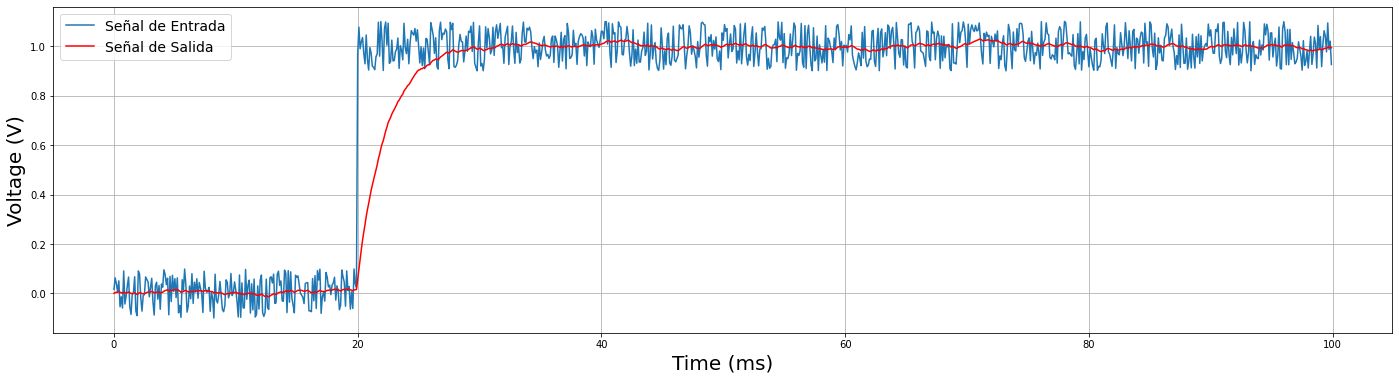

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

class FiltroRC:

  ## Inicializacion de la clase:

  ##  Dos parámetros claves: R*C y Ts
  ## También podemos el valor inicial del filtro
  def __init__(self,RC,Ts,initial=0):
    self.RC = RC
    self.Ts = Ts
    # Aprovechamos para calcular los parámetros K0 y K1
    self.k0 = RC/Ts+1
    self.k1 = RC/Ts
    self.vo = initial

  ## Etapa de filtro, recuerda el último valor de salida.
  ## Paso de filtrado, aportas la señal de entrada, elemento
  ## a elemento y va devolviendo salida, elemento a elemento.
  def step(self,vi):
    ## La salida actual ya es antigua

    r = vi+self.vo*self.k1
    r = r/self.k0
    self.vo = r
    return r

## Inicializamos el 'ruido'
random.seed(133232)


## Inicialización:
## fs: frecuencia de muestreo
fs = 10000
## Valor de R
R = 2200
## Valor de C
C = 1e-6
## Noise gain: Relación entre la señal y el ruido
ngain = 0.1

Ts= 1/fs
RC  = R*C


time = []
vi = []
vo = []
f = FiltroRC(RC,Ts)

for ix in range(1000):

  ## Computo del tiempo (multiplicado *1000, en milisegundos)
  time.append(ix*Ts*1000)

  ## Generación de ruido (señal aleatoria en el rango [-1,1])
  noise = random.random()*2-1

  ## Señal (escalón unitario para a partir de la secuencia 150)
  signal = 0 if ix < 200 else 1


  ## Se añade la señal de entrada: suma de signal + noise*ngain
  vi.append(signal+noise*ngain)
  ## Introducimos el último valor introducido en el filtro RC y almacenamos 
  ## el valor filtrado
  vo.append(f.step(vi[-1]))

## Representación gráfica de las señales.
figure(figsize=(24,6))
plt.plot(time,vi,label='Señal de Entrada')
plt.plot(time,vo,'r',label='Señal de Salida')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.legend(fontsize=14)
plt.grid()

plt.show()



### Conclusiones

Hemos visto como a partir de una ecuación en el dominio de Laplace podemos simular su comportamiento en tiempo discreto a partir una transformación sencilla.  Dado que el diseño de los filtros activos descomponen sus funciones en elementos de segundo orden de la forma genérica:

\begin{equation}
H(s)=\dfrac{v_o(s)}{v_i(s)}=\dfrac{a_0+a_1 s+a_2 s^2}{b_0+b_1 s+b_2 s^2}
\end{equation}

Podemos deducir que:

\begin{equation}
b_0 v_o(s)+
b_1 \dfrac{d v_o(s)}{dt}+
b_2 \dfrac{d^2 v_o(s)}{dt^2}=
a_0 v_i(s)+
a_1 \dfrac{d v_i(s)}{dt}+
a_2 \dfrac{d^2 v_i(s)}{dt^2}
\end{equation}

Traducido a secuencias será:
\begin{equation}
b_0 v_o[n]+
b_1 v_o'[n]+
b_2 v_o''[n]=
a_0 v_i[n]+
a_1 v_i'[n]+
a_2 v_i''[n]
\end{equation}

Desarrollando las derivadas y agrupando resulta:

\begin{equation}
v_o[n]=\dfrac{1}{k_0}\left(
v_i[n]\cdot l_0+
v_i[n-1]\cdot l_1+
v_i[n-2]\cdot l_2-
v_o[n-1]\cdot k_1-
v_o[n-2]\cdot k_2
\right)
\end{equation}


Donde:

\begin{equation}
\left\{
\begin{array}{cp{0.4cm}cp{0.4cm}c}
l_0=\dfrac{a_2}{T_s^2}+\dfrac{a_1}{T_s}+a_0&&
l_1=-\left(\dfrac{2a_2}{T_s^2}+\dfrac{a_1}{T_s}\right)&&
l_2=\dfrac{a_2}{T_S}\\
&&&&\\
k_0=\dfrac{b_2}{T_s^2}+\dfrac{b_1}{T_s}+b_0&&
k_1=-\left(\dfrac{2b_2}{T_s^2}+\dfrac{b_1}{T_s}\right)&&
k_2=\dfrac{b_2}{T_S}\\
\end{array}
\right.
\end{equation}


En python se puede hacer una clase que defina esta etapa, y luego instanciar las etapas que hagan falta:



In [17]:

import math

## Generación de un filtro de segundo orden paso bajo a partir
## de los coeficientes b (segundo orden) y a (primer orden)
def LowPassTransform(b,a,wo):
  am = [1,0,0]
  bm = [1]
  v = a/wo
  bm.append(v)
  v= b/(wo*wo)
  bm.append(v)
  return (am,bm)


def HighPassTransform(b,a,wo):
  am = [0,0,0]
  bm = [1]
  v = a/wo
  bm.append(v)
  v= b/(wo*wo)
  bm.append(v)
  am[2]=bm[2]
  return (am,bm)

class filt2:

  def S2Z(self,c,t):
    r = []
    r.append( c[0]+c[1]/t+c[2]/(t*t))
    r.append( -c[1]/t-2*c[2]/(t*t))
    r.append( c[2]/(t*t))
    return r


  def __init__ (self,a,b,Ts,init_vi=[0,0,0],init_vo=[0,0,0]):
    if type(a) is not list or type(b) is not list:
      self.k=[]
      self.l=[]
    else:
      self.l = self.S2Z(a,Ts).copy()
      self.k = self.S2Z(b,Ts).copy()
    
    self.vi = init_vi.copy()
    self.vo = init_vo.copy()


  def Step(self,vi):
    ## Primero retrasamos las señales un paso
    self.vo[2]=self.vo[1]
    self.vo[1]=self.vo[0]

    self.vi[2]=self.vi[1]
    self.vi[1]=self.vi[0]
    self.vi[0]=vi

    ## Ahora procedemos a calcular los coeficientes:
    v = 0
    for ix in range(3):
      v += self.l[ix]*self.vi[ix]
    
    for ix in range(1,3):
      v -= self.k[ix]*self.vo[ix]
    
    v = v/self.k[0]
    self.vo[0]=v
    return v




### Primera prueba: Filtro paso-bajo Butterworth, segundo orden.


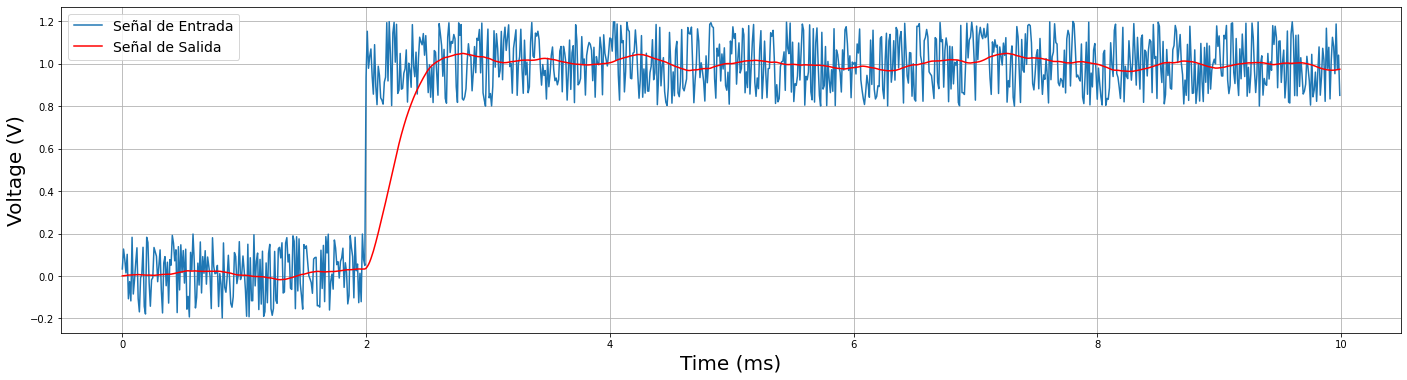

In [24]:


## Frecuencia de corte
fc = 1000
#Frecuencia de muestreo
fs = 100000
## Noise gain: Relación entre la señal y el ruido
ngain = 0.2


Ts = 1/fs
wc = 2*math.pi*fc


## Butterworth, 2º orden
(pba,pbb)=LowPassTransform(1,math.sqrt(2),wc)
But2_1k = filt2(pba,pbb,Ts)

random.seed(133232)
time = []
vi = []
vo = []

for ix in range(1000):

  ## Computo del tiempo (multiplicado *1000, en milisegundos)
  time.append(ix*Ts*1000)

  ## Generación de ruido (señal aleatoria en el rango [-1,1])
  noise = random.random()*2-1

  ## Señal (escalón unitario para a partir de la secuencia 150)
  signal = 0 if ix < 200 else 1


  ## Se añade la señal de entrada: suma de signal + noise*ngain
  vi.append(signal+noise*ngain)
  ## Introducimos el último valor introducido en el filtro RC y almacenamos 
  ## el valor filtrado
  vo.append(But2_1k.Step(vi[-1]))

## Representación gráfica de las señales.
figure(figsize=(24,6))
plt.plot(time,vi,label='Señal de Entrada')
plt.plot(time,vo,'r',label='Señal de Salida')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.legend(fontsize=14)
plt.grid()

plt.show()

### Segundo ejemplo, filtro paso bajo de 8º orden Butterworth

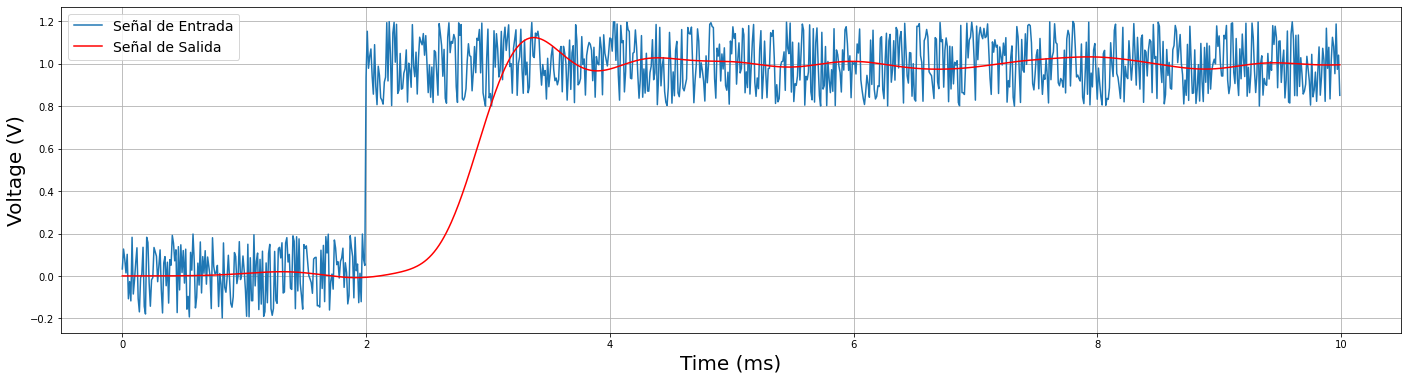

In [31]:
## Frecuencia de corte
fc = 1000
#Frecuencia de muestreo
fs = 100000
## Noise gain: Relación entre la señal y el ruido
ngain = 0.2


Ts = 1/fs
wc = 2*math.pi*fc


b_coeff = [1,1,1,1]
a_coeff = [0.39018,1.11114,1.66294,1.96157]
stages = []
for ix in range(4):
  (pba,pbb)=LowPassTransform(b_coeff[ix],a_coeff[ix],wc)
  stages.append(filt2(pba,pbb,Ts))


random.seed(133232)
time = []
vi = []
vo = []


for ix in range(1000):

  ## Computo del tiempo (multiplicado *1000, en milisegundos)
  time.append(ix*Ts*1000)

  ## Generación de ruido (señal aleatoria en el rango [-1,1])
  noise = random.random()*2-1

  ## Señal (escalón unitario para a partir de la secuencia 150)
  signal = 0 if ix < 200 else 1


  ## Se añade la señal de entrada: suma de signal + noise*ngain
  vi.append(signal+noise*ngain)
  ## Introducimos el último valor introducido en el filtro RC y almacenamos 
  ## el valor filtrado
  vaux = vi[-1]
  ## Ejecutamos las cuatro etapas.
  for jx in range(4):
    vaux = stages[jx].Step(vaux)

  vo.append(vaux)

## Representación gráfica de las señales.
figure(figsize=(24,6))
plt.plot(time,vi,label='Señal de Entrada')
plt.plot(time,vo,'r',label='Señal de Salida')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.legend(fontsize=14)
plt.grid()

plt.show()




# Aproximación bilineal

La aproximación con la derivada no es tan eficiente cuando las frecuencias de corte están cerca de la mitad de la frecuencia de muestreo. Existe una aproximación mejor: la transformación bilineal. Esta se basa en una transformación directa en el dominio transformado $z$. Básicamente se basa en hacer la siguiente sustitución:

\begin{equation}
s \approx \dfrac{2}{T_s}\dfrac{1-z^{-1}}{1+z^{-1}}
\end{equation}

Aplicado a una ecuación de segundo orden del tipo general:



\begin{equation}
H(s)=\dfrac{v_o(s)}{v_i(s)}=\dfrac{a_0+a_1 s+a_2 s^2}{b_0+b_1 s+b_2 s^2}
\end{equation}

Vuelve a salir algo del tipo:

\begin{equation}
v_o[n]=\dfrac{1}{k_0}\left(
v_i[n]\cdot l_0+
v_i[n-1]\cdot l_1+
v_i[n-2]\cdot l_2-
v_o[n-1]\cdot k_1-
v_o[n-2]\cdot k_2
\right)
\end{equation}

Donde ahora, los coeficientes son:

\begin{equation}
\left\{
\begin{array}{cp{0.4cm}cp{0.4cm}c}
l_0=\dfrac{4a_2}{T_s^2}+\dfrac{2a_1}{T_s}+a_0&&
l_1=\left(a_0-\dfrac{8a_2}{T_s^2}\right)&&
l_2=\dfrac{4a_2}{T_s^2}-\dfrac{2a_1}{T_s}+a_0\\
&&&&\\
k_0=\dfrac{4b_2}{T_s^2}+\dfrac{2b_1}{T_s}+b_0&&
k_1=\left(b_0-\dfrac{8b_2}{T_s^2}\right)&&
k_2=\dfrac{4b_2}{T_s^2}-\dfrac{2b_1}{T_s}+b_0\\
\end{array}
\right.
\end{equation}




## Implementación de la version bilineal

In [32]:
class FBilineal:

  def S2Z(self,c,t):
    r = []
    r.append( c[0]+2*c[1]/t+4*c[2]/(t*t) )
    r.append( c[0]-8*c[2]/(t*t) )
    r.append( c[0]-2*c[1]/t+4*c[2]/(t*t) )
    return r


  def __init__ (self,a,b,Ts,init_vi=[0,0,0],init_vo=[0,0,0]):
    if type(a) is not list or type(b) is not list:
      self.k=[]
      self.l=[]
    else:
      self.l = self.S2Z(a,Ts).copy()
      self.k = self.S2Z(b,Ts).copy()
    
    self.vi = init_vi.copy()
    self.vo = init_vo.copy()


  def Step(self,vi):
    ## Primero retrasamos las señales un paso
    self.vo[2]=self.vo[1]
    self.vo[1]=self.vo[0]

    self.vi[2]=self.vi[1]
    self.vi[1]=self.vi[0]
    self.vi[0]=vi

    ## Ahora procedemos a calcular los coeficientes:
    v = 0
    for ix in range(3):
      v += self.l[ix]*self.vi[ix]
    
    for ix in range(1,3):
      v -= self.k[ix]*self.vo[ix]
    
    v = v/self.k[0]
    self.vo[0]=v
    return v



### Reintrepretación del filtro de 8º orden con transformación bilineal

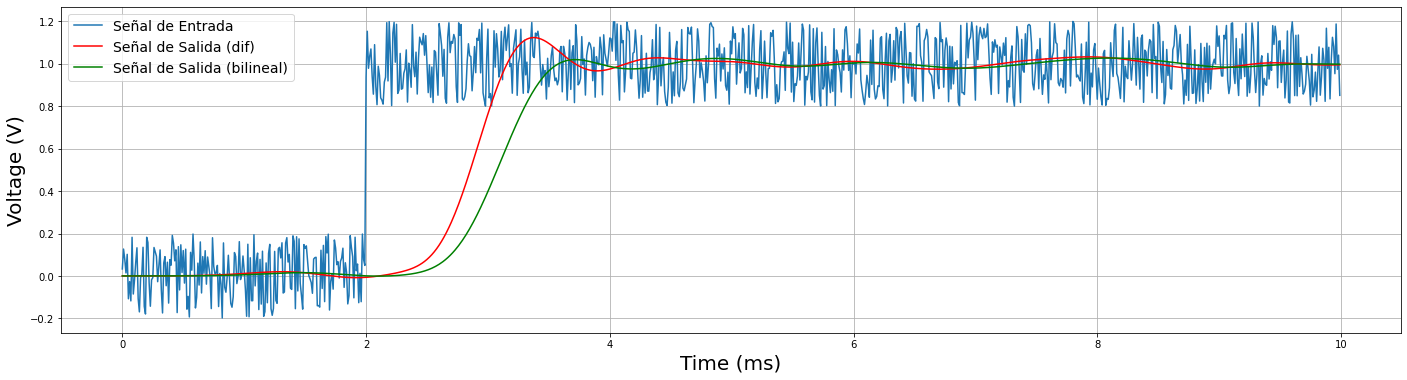

In [33]:
## Frecuencia de corte
fc = 1000
#Frecuencia de muestreo
fs = 100000
## Noise gain: Relación entre la señal y el ruido
ngain = 0.2


Ts = 1/fs
wc = 2*math.pi*fc


b_coeff = [1,1,1,1]
a_coeff = [0.39018,1.11114,1.66294,1.96157]
stages = []
for ix in range(4):
  (pba,pbb)=LowPassTransform(b_coeff[ix],a_coeff[ix],wc)
  stages.append(FBilineal(pba,pbb,Ts))


random.seed(133232)

vob = []


for ix in range(1000):

  ## Generación de ruido (señal aleatoria en el rango [-1,1])
  noise = random.random()*2-1



  ## Introducimos el último valor introducido en el filtro RC y almacenamos 
  ## el valor filtrado
  vaux = vi[ix]
  ## Ejecutamos las cuatro etapas.
  for jx in range(4):
    vaux = stages[jx].Step(vaux)

  vob.append(vaux)

## Representación gráfica de las señales.
figure(figsize=(24,6))
plt.plot(time,vi,label='Señal de Entrada')
plt.plot(time,vo,'r',label='Señal de Salida (dif)')
plt.plot(time,vob,'g',label='Señal de Salida (bilineal)')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.legend(fontsize=14)
plt.grid()

plt.show()


### Ejemplo: Implementación de un filtro paso-alto de 8º orden:



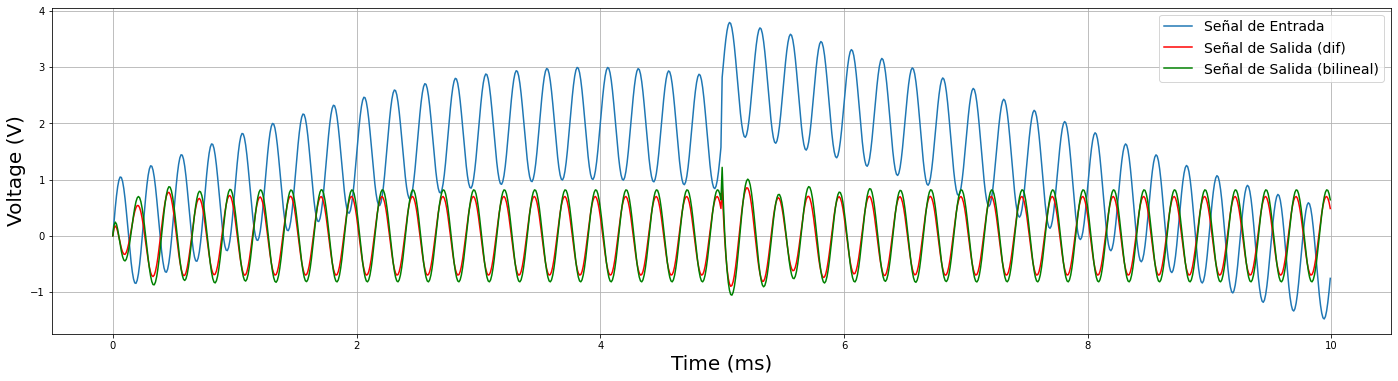

In [43]:
## Frecuencia de corte
fc = 2000
#Frecuencia de muestreo
fs = 100000
## Noise gain: Relación entre la señal y el ruido
ngain = 2
## Frecuencia de la señal de interés
fsig = 4000
## Frecuencia de la señal interferente de baja frecuencia
fint = 400

Ts = 1/fs
wc = 2*math.pi*fc
ws = 2*math.pi*fsig
wint = 2*math.pi*fint

b_coeff = [1,1,1,1]
a_coeff = [0.39018,1.11114,1.66294,1.96157]
stages_d = []
stages_b = []
for ix in range(4):
  (pba,pbb)=HighPassTransform(b_coeff[ix],a_coeff[ix],wc)
  stages_b.append(FBilineal(pba,pbb,Ts))
  stages_d.append(filt2(pba,pbb,Ts))



vob = []
vod = []
vi = []

for ix in range(1000):
  ## Ahora la señal interferente será una senoide de baja frecuencia
  tm = ix*Ts
  pulse = 0 if ix < 500 else 1
  signal = math.sin(tm*ws)
  ifx = math.sin(tm*fint)
  vi.append(signal+ifx*ngain+pulse)

  ## Introducimos el último valor introducido en el filtro RC y almacenamos 
  ## el valor filtrado 
  ### Version bilineal
  vaux = vi[-1]
  ## Ejecutamos las cuatro etapas.
  for jx in range(4):
    vaux = stages_b[jx].Step(vaux)
  vob.append(vaux)

  ### Version diferencias
  vaux = vi[-1]
  ## Ejecutamos las cuatro etapas.
  for jx in range(4):
    vaux = stages_d[jx].Step(vaux)
  vod.append(vaux)

## Representación gráfica de las señales.
figure(figsize=(24,6))
plt.plot(time,vi,label='Señal de Entrada')
plt.plot(time,vod,'r',label='Señal de Salida (dif)')
plt.plot(time,vob,'g',label='Señal de Salida (bilineal)')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.legend(fontsize=14)
plt.grid()

plt.show()



#### Detalle del salto

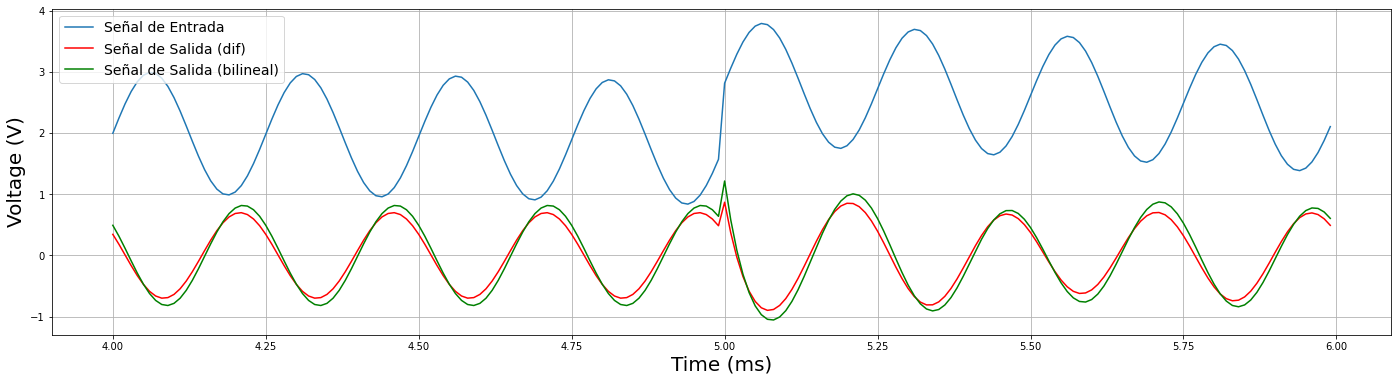

In [44]:
## Representación gráfica de las señales.
figure(figsize=(24,6))
plt.plot(time[400:600],vi[400:600],label='Señal de Entrada')
plt.plot(time[400:600],vod[400:600],'r',label='Señal de Salida (dif)')
plt.plot(time[400:600],vob[400:600],'g',label='Señal de Salida (bilineal)')
plt.xlabel('Time (ms)',fontsize=20)
plt.ylabel('Voltage (V)',fontsize=20)
plt.legend(fontsize=14)
plt.grid()

plt.show()
